### 볼린저밴드
1. 이동평균선: 데이터 20개의 평균값
2. 상단 밴드: 이동평균선 + (2 * 데이터 20개의 표준편차)
3. 하단 밴드: 이동평균선 - (2 * 데이터 20개의 표준편차)
4. 매수의 조건식: 가격이 하단밴드보다 낮은 경우
5. 매도의 조건식: 가격이 상단밴드보다 높은 경우

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [4]:
df = pd.read_csv('../../csv/AAPL.csv')

In [5]:
if 'Date' in df.columns:
    df.set_index('Date', inplace=True)

In [6]:
# 결측치, 무한대(양, 음) 제거
flag = df.isin( [np.nan, np.inf, -np.inf] ).any(axis=1)
df = df.loc[-flag, ['Adj Close']]

In [7]:
df

,Adj Close
Date,
1980-12-12,0.410525
1980-12-15,0.389106
1980-12-16,0.360548
1980-12-17,0.369472
1980-12-18,0.380182
...,...
2019-06-18,198.449997
2019-06-19,197.869995
2019-06-20,199.460007


In [8]:
# df의 인덱스를 시계열로 변경
df.index = pd.to_datetime(df.index)

In [9]:
# Adj Close의 데이터에서 20일 이동평균선 구하기
df.iloc[0:20, 0].mean()
# df.iloc[19] 위치에 평균값 대입

np.float64(0.4432777)

In [10]:
# 이동평균선 컬럼 생성하여 결측치로 채워둠
df['center'] = np.nan

In [11]:
df

,Adj Close,center
Date,,
1980-12-12,0.410525,NaN
1980-12-15,0.389106,NaN
1980-12-16,0.360548,NaN
1980-12-17,0.369472,NaN
1980-12-18,0.380182,NaN
...,...,...
2019-06-18,198.449997,NaN
2019-06-19,197.869995,NaN
2019-06-20,199.460007,NaN


In [12]:
df.iloc[19, 1] = df.iloc[0:20, 0].mean()

In [13]:
df.iloc[18:22]

,Adj Close,center
Date,,
1981-01-09,0.455147,NaN
1981-01-12,0.451577,0.443278
1981-01-13,0.435513,NaN
1981-01-14,0.437298,NaN


In [14]:
for i in range(20, len(df)):
    df.iloc[i-1, 1] = df.iloc[ i-20 : i, 0 ].mean()

In [15]:
df.iloc[18:22]

,Adj Close,center
Date,,
1981-01-09,0.455147,NaN
1981-01-12,0.451577,0.443278
1981-01-13,0.435513,0.444527
1981-01-14,0.437298,0.446937


In [16]:
# rolling(n): n개의 데이터를 그룹화
df['center2'] = df['Adj Close'].rolling(20).mean()

In [17]:
df.iloc[18:25, ]

,Adj Close,center,center2
Date,,,
1981-01-09,0.455147,NaN,NaN
1981-01-12,0.451577,0.443278,0.443278
1981-01-13,0.435513,0.444527,0.444527
1981-01-14,0.437298,0.446937,0.446937
1981-01-15,0.446223,0.451220,0.451220
1981-01-16,0.442653,0.454879,0.454879
1981-01-19,0.469426,0.459342,0.459342


In [18]:
# 표준편차 계산 함수: std()
# 상단 밴드 생성: 이동평균선 + (2 * 20개 데이터의 표준편차)
df['ub'] = df['center'] + (2 * df['Adj Close'].rolling(20).std())

In [19]:
# 하단 밴드 생성: 이동평균선 - (2 * 20개 데이터의 표준편차)
df['lb'] = df['center'] - (2 * df['Adj Close'].rolling(20).std())

In [20]:
df.iloc[18:22]

,Adj Close,center,center2,ub,lb
Date,,,,,
1981-01-09,0.455147,NaN,NaN,NaN,NaN
1981-01-12,0.451577,0.443278,0.443278,0.536950,0.349605
1981-01-13,0.435513,0.444527,0.444527,0.537019,0.352035
1981-01-14,0.437298,0.446937,0.446937,0.535789,0.358084


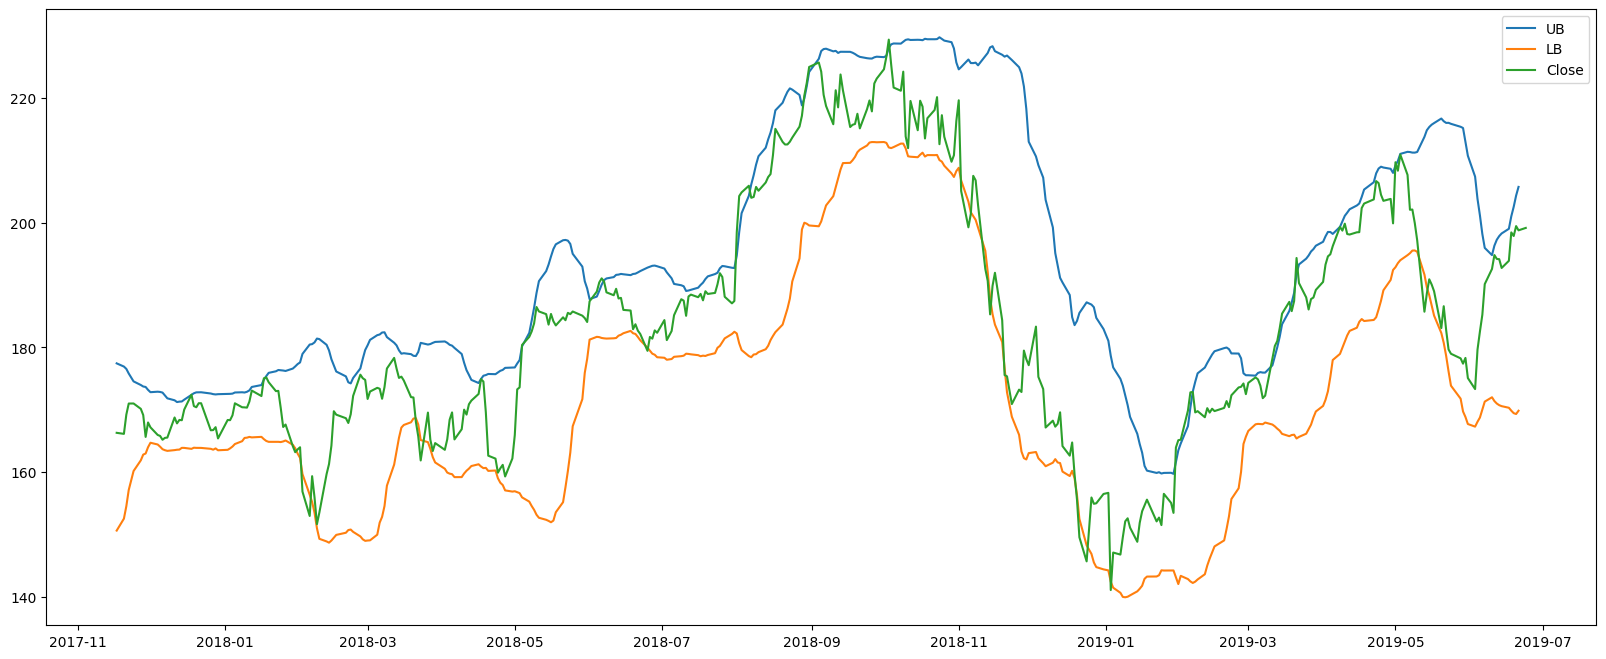

In [21]:
plt.figure(figsize=(20, 8))
test = df.tail(400)
plt.plot(test['ub'], label='UB')
plt.plot(test['lb'], label='LB')
plt.plot(test['Adj Close'], label='Close')

plt.legend()
plt.show()


In [22]:
# 투자의 시작 시간 설정
start = '2010-01-01'

In [23]:
price_df = df.loc[start:, ]

In [24]:
# 구매 상태 컬럼 생성
price_df['trade'] = ''

C:\Users\toqha\AppData\Local\Temp\ipykernel_23756\3319207282.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df['trade'] = ''


In [25]:
price_df

,Adj Close,center,center2,ub,lb,trade
Date,,,,,,
2010-01-04,26.782711,25.037723,25.037723,27.046734,23.028713,
2010-01-05,26.829010,25.169503,25.169503,27.288098,23.050908,
2010-01-06,26.402260,25.307290,25.307290,27.366449,23.248130,
2010-01-07,26.353460,25.436879,25.436879,27.410937,23.462821,
2010-01-08,26.528664,25.525609,25.525609,27.529742,23.521475,
...,...,...,...,...,...,...
2019-06-18,198.449997,185.432500,185.432500,201.032574,169.832427,
2019-06-19,197.869995,185.996000,185.996000,202.558154,169.433846,
2019-06-20,199.460007,186.830000,186.830000,204.361771,169.298229,


#### 보유 내역 추가
- 조건식
    - 수정종가가 상단밴드보다 높거나 같은 경우
        - 현재 보유 상태라면
            - 매도 (trade = '')
        - 현재 보유 상태가 아니라면
            - 유지 (trade = '')
    - 수정종가가 상단밴드보다 낮고 하단밴드보다 높은 경우
        - 현재 보유상태라면
            - 유지 (trade = 'buy')
        - 현재 보유 상태가 아니라면
            - 유지 (trade = '')
    - 수정종가가 하단밴드보다 낮거나 같은 경우
        - 현재 보유상태라면
            - 유지 (trade = 'buy')
        - 현재 보유 상태가 아니라면
            - 매수 (trade = 'buy')

In [26]:
for idx in price_df.index:
    # idx에 들어오는 데이터: 시계열 데이터
    # 수정종가가 상단밴드보다 높거나 같은 경우
    if price_df.loc[idx, 'Adj Close'] >= price_df.loc[idx, 'ub']:
        # 현재 보유 상태라면
        if price_df.shift().loc[idx, 'trade'] == 'buy':
            # 오늘의 trade는 매도
            price_df.loc[idx, 'trade'] = ''
        else:
            # 오늘의 trade는 유지
            price_df.loc[idx, 'trade'] = ''
    
    # 수정종가가 하단밴드보다 낮거나 같은 경우
    elif price_df.loc[idx, 'Adj Close'] <= price_df.loc[idx, 'lb']:
        # 현재 보유 상태라면
        if price_df.shift().loc[idx, 'trade'] == 'buy':
            # 오늘의 trade는 유지
            price_df.loc[idx, 'trade'] = 'buy'
        else:
            # 오늘의 trade는 매수
            price_df.loc[idx, 'trade'] = 'buy'
    
    # 수정종가가 상단밴드보다 낮고 하단밴드보다 높은 경우
    # elif (price_df.loc[idx, 'Adj Close'] < price_df.loc[idx, 'ub']) & (price_df.loc[idx, 'Adj Close'] > price_df.loc[idx, 'lb'])
    else:
        # 현재 보유상태라면
        if price_df.shift().loc[idx, 'trade'] == 'buy':
            # 오늘의 trade는 유지
            price_df.loc[idx, 'trade'] = 'buy'
        else:
            # 오늘의 trade는 유지
            price_df.loc[idx, 'trade'] = ''

In [27]:
price_df['trade'].value_counts()

trade
       1439
buy     945
Name: count, dtype: int64

### 수익률 계산
- 매수한 날의 수정종가 
    - 전날의 trade가 ''이고, 오늘의 trade가 'buy'인 날의 수정종가
- 매도한 날의 수정종가
    - 전날의 trade가 'buy'이고, 오늘의 trade가 ''인 날의 수정종가
- 수익률
    - 매도한 날의 수정종가 / 매수한 날의 수정종가

In [28]:
price_df

,Adj Close,center,center2,ub,lb,trade
Date,,,,,,
2010-01-04,26.782711,25.037723,25.037723,27.046734,23.028713,
2010-01-05,26.829010,25.169503,25.169503,27.288098,23.050908,
2010-01-06,26.402260,25.307290,25.307290,27.366449,23.248130,
2010-01-07,26.353460,25.436879,25.436879,27.410937,23.462821,
2010-01-08,26.528664,25.525609,25.525609,27.529742,23.521475,
...,...,...,...,...,...,...
2019-06-18,198.449997,185.432500,185.432500,201.032574,169.832427,buy
2019-06-19,197.869995,185.996000,185.996000,202.558154,169.433846,buy
2019-06-20,199.460007,186.830000,186.830000,204.361771,169.298229,buy


In [29]:
# 수익률 컬럼 생성, 기본값 1
price_df['rtn'] = 1

for idx in price_df.index:
    # 매수가 생성
    # 전날 -> shift() 사용
    if (price_df.shift().loc[idx, 'trade'] == '') & \
        (price_df.loc[idx, 'trade'] == 'buy'):
        # 매수가를 변수에 저장
        buy = price_df.loc[idx, 'Adj Close']
        print(f'매수일: {idx}, 매수가: {buy}')
    # 매도가 생성
    elif (price_df.shift().loc[idx, 'trade'] == 'buy') & \
        (price_df.loc[idx, 'trade'] == ''):
        # 매도가를 변수에 저장
        sell = price_df.loc[idx, 'Adj Close']
        
        # 수익률 계산
        rtn = sell / buy
        price_df.loc[idx, 'rtn'] = rtn
        print(f'매도일: {idx}, 매도가: {sell}, 수익률: {rtn}')

C:\Users\toqha\AppData\Local\Temp\ipykernel_23756\3556602881.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df['rtn'] = 1
C:\Users\toqha\AppData\Local\Temp\ipykernel_23756\3556602881.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.0568396777445188' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  price_df.loc[idx, 'rtn'] = rtn


매수일: 2010-01-22 00:00:00, 매수가: 24.747818
매도일: 2010-03-01 00:00:00, 매도가: 26.154476, 수익률: 1.0568396777445188
매수일: 2010-08-24 00:00:00, 매수가: 30.026524
매도일: 2010-09-08 00:00:00, 매도가: 32.90366, 수익률: 1.0958198158401553
매수일: 2011-03-16 00:00:00, 매수가: 41.299767
매도일: 2011-07-01 00:00:00, 매도가: 42.957966, 수익률: 1.040150323366231
매수일: 2011-11-14 00:00:00, 매수가: 47.463268
매도일: 2011-12-27 00:00:00, 매도가: 50.876015, 수익률: 1.0719029081604747
매수일: 2012-04-16 00:00:00, 매수가: 72.601524
매도일: 2012-06-18 00:00:00, 매도가: 73.308609, 수익률: 1.0097392583659814
매수일: 2012-10-08 00:00:00, 매수가: 80.207954
매도일: 2013-07-29 00:00:00, 매도가: 57.243137, 수익률: 0.7136840443530077
매수일: 2013-09-11 00:00:00, 매수가: 60.184383
매도일: 2013-10-18 00:00:00, 매도가: 65.48336, 수익률: 1.0880457144505413
매수일: 2014-01-03 00:00:00, 매수가: 70.019096
매도일: 2014-03-25 00:00:00, 매도가: 70.960335, 수익률: 1.0134426042861222
매수일: 2014-10-15 00:00:00, 매수가: 89.842468
매도일: 2014-10-23 00:00:00, 매도가: 96.557182, 수익률: 1.0747387527243797
매수일: 2014-12-12 00:00:00, 매수가: 101.50875

In [30]:
price_df['acc_rtn'] = price_df['rtn'].cumprod()

C:\Users\toqha\AppData\Local\Temp\ipykernel_23756\3191515952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df['acc_rtn'] = price_df['rtn'].cumprod()


In [31]:
price_df.iloc[-1, -1]

np.float64(1.3923287814461949)

#### 밴드 생성 함수 (create_band)
- 매개변수 5개
    - _df: 데이터프레임 -> 필수
    - _start: 투자의 시작시간 -> 기본값 2010-01-01
    - _end: 투자의 종료시간 -> 기본값 현재 시간
    - _col: 기준이 되는 컬럼명: 기본값 'Adj Close'
    - _cnt: 평균선의 일자수 -> 기본값 20
1. _df의 복사본 생성 (df 변수 생성)
2. 컬럼에 Date가 존재한다면 Date 컬럼을 인덱스로 변경
3. df의 인덱스를 시계열로 변환
4. 기준이 되는 컬럼을 제외하고 나머지 컬럼 모두 제거
5. 결측치, 양의무한대, 음의무한대 데이터 제거
6. 이동평균선, 상단밴드, 하단밴드 생성
7. 시작시간, 종료시간 기준으로 데이터 필터링
8. 변경된 데이터프레임 반환

In [32]:
def create_band(_df, _start = '2010-01-01', _end = datetime.now(), _col = 'Adj Close', _cnt = 20):
    # 입력받은 데이터프레임 복사본 생성
    df = _df.copy()

    # 'Date'가 컬럼에 존재하면 인덱스로 변환
    if 'Date' in df.columns:
        df.set_index('Date', inplace=True)
    # df의 인덱스를 시계열로 변경
    df.index = pd.to_datetime(df.index)
    
    # 기준이 되는 컬럼을 제외하고 모두 제거 -> 특정 컬럼만 선택
    df = df[[_col]]

    # 결측치, 무한대 제거
    flag = df.isin( [np.nan, np.inf, -np.inf] ).any(axis=1)
    df = df.loc[-flag, ]

    # 이동평균선 컬럼 생성
    df['center'] = df[_col].rolling(_cnt).mean()
    std_data = df[_col].rolling(_cnt).std()
    # 상단 밴드 생성: 이동평균선 + (2 * 20개 데이터의 표준편차)
    df['ub'] = df['center'] + (2 * std_data)
    # 허단 밴드 생성: 이동평균선 + (2 * 20개 데이터의 표준편차)
    df['lb'] = df['center'] - (2 * std_data)

    # 시작시간, 종료시간으로 데이터 필터링
    try: 
       df = df.loc[_start : _end, ]
    except Exception as e:
        print(e)
        print('인자값이 잘못되었습니다')
        return ""
    
    return df

In [33]:
_df = pd.read_csv('../../csv/AMZN.csv')

In [34]:
price_df2 = create_band(_df)

In [35]:
price_df2

,Adj Close,center,ub,lb
Date,,,,
2010-01-04,133.899994,133.984001,141.460445,126.507556
2010-01-05,134.690002,133.839500,141.132776,126.546225
2010-01-06,132.250000,133.741500,141.066419,126.416581
2010-01-07,130.000000,133.536000,141.045671,126.026329
2010-01-08,133.520004,133.646500,141.082939,126.210062
...,...,...,...,...
2019-06-18,1901.369995,1821.456500,1935.384678,1707.528322
2019-06-19,1908.790039,1824.020001,1943.535145,1704.504858
2019-06-20,1918.189941,1826.945495,1952.830613,1701.060378


In [36]:
def bollinger(_df, _count=200):
    plt.figure(figsize=(20, 8))
    test = _df.tail(_count)
    plt.plot(test['ub'], label='UB')
    plt.plot(test['lb'], label='LB')
    plt.plot(test['Adj Close'], label='Close')

    plt.legend()
    plt.show()

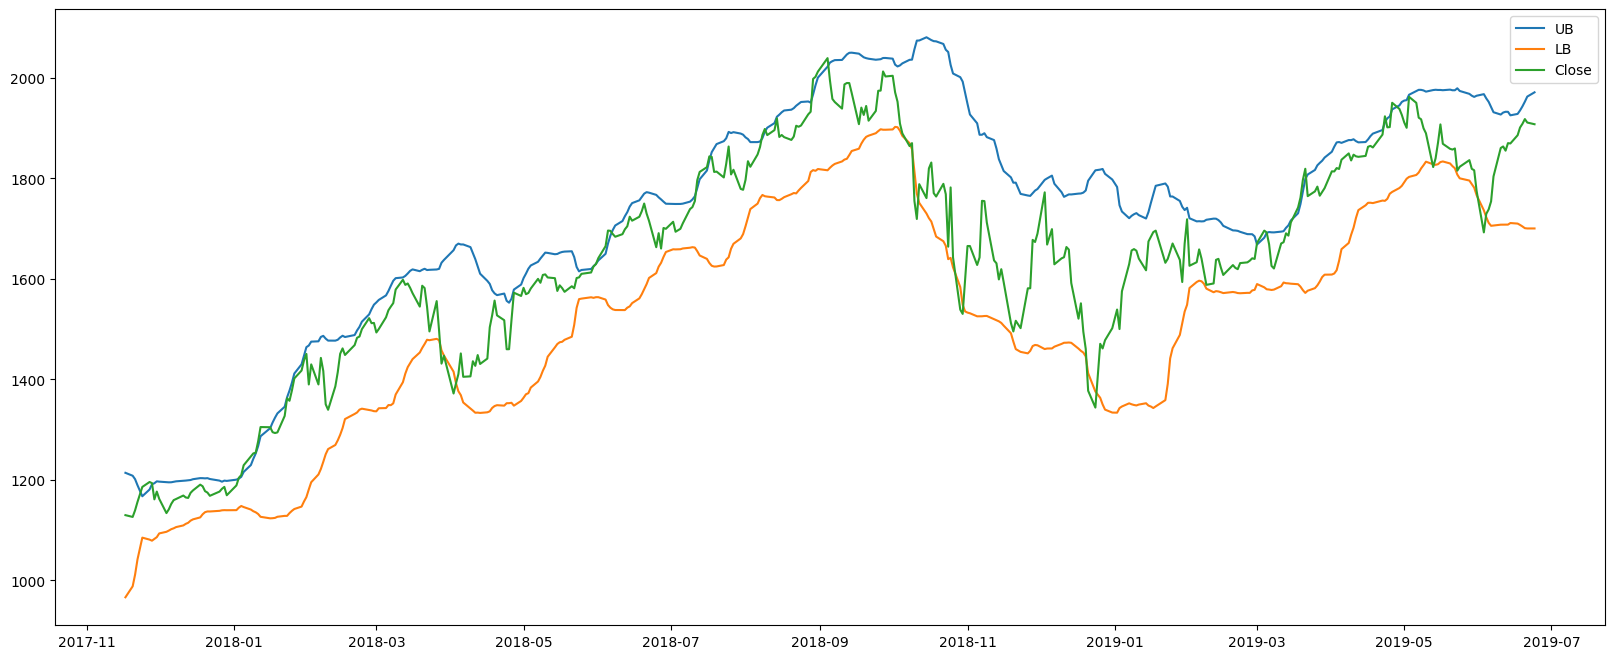

In [37]:
bollinger(create_band(_df), 400)

#### 트레이드 컬럼을 생성하는 함수(create_trade)
- 매개변수 1개
    - create_band() 함수의 결과 데이터프레임
1. 데이터프레임 복사본 생성
2. trade 컬럼을 생성하여 '' 대입
3. 밴드의 값들과 기준이 되는 컬럼을 가지고 보유 내역을 생성

In [38]:
def create_trade(_df):
    # 데이터프레임의 복사본 생성
    df = _df.copy()
    
    df['trade'] = ''
    
    # 기준 컬럼의 이름을 변수에 저장
    col = df.columns[0]
    
    # 기준 컬럼의 값과 밴드 값을 비교해 거래내역 컬럼 생성 
    for idx in df.index:
    # idx에 들어오는 데이터: 시계열 데이터
    # 기준 컬럼의 값이 상단밴드보다 크거나 같은 경우
        if df.loc[idx, col] >= df.loc[idx, 'ub']:
                df.loc[idx, 'trade'] = ''
        
        # 수정종가가 하단밴드보다 작거나 같은 경우
        elif df.loc[idx, col] <= df.loc[idx, 'lb']:
                df.loc[idx, 'trade'] = 'buy'
        
        # 수정종가가 상단밴드보다 낮고 하단밴드보다 높은 경우
        else:
            # 현재 보유상태라면 보유 유지
            # 보유상태가 아니라면 -> 유지
            # 전날의 trade를 그대로 유지
            df.loc[idx, 'trade'] = df.shift().loc[idx, 'trade']

    
    return df

In [43]:
trade_df = create_trade(price_df2)

In [44]:
trade_df['trade'].value_counts()

trade
       1483
buy     863
Name: count, dtype: int64

#### 수익률 계산 함수
- 매개변수 1개
    - create_trade() 함수의 결과 데이터프레임
1. 데이터프레임 복사본 생성
2. 기준이 되는 컬럼 이름을 변수에 저장
3. rtn 컬럼을 이용해 수익률 계산
4. acc_rtn 컬럼을 생성해 누적 수익률을 계산한 값 대입
5. 결과 데이터프레임, 최종 누적 수익률 반환

In [67]:
def create_rtn(_df):
    # 데이터프레임 복사본 생성
    df = _df.copy()
    # 기준이 되는 컬럼 이름을 변수에 저장
    col = df.columns[0]
    # 수익률 컬럼 생성, 기본값 1
    df['rtn'] = 1

    # 수익률 계산
    for idx in df.index:
        # 매수가 생성
        # 전날 -> shift() 사용
        if (df.shift().loc[idx, 'trade'] == '') & \
            (df.loc[idx, 'trade'] == 'buy'):
            # 매수가를 변수에 저장
            buy = df.loc[idx, col]
            print(f'매수일: {idx}, 매수가: {buy}')
        # 매도가 생성
        elif (df.shift().loc[idx, 'trade'] == 'buy') & \
            (df.loc[idx, 'trade'] == ''):
            # 매도가를 변수에 저장
            sell = df.loc[idx, col]
            # 수익률 계산
            rtn = sell / buy
            df.loc[idx, 'rtn'] = rtn
            print(f'매도일: {idx}, 매도가: {sell}, 수익률: {rtn}')

    # 누적수익률 계산
    df['acc_rtn'] = df['rtn'].cumprod()
    # 최종누적수익률
    final_acc_rtn = df.iloc[-1, -1]
    
    return df, final_acc_rtn

In [69]:
boll_df, boll_rtn = create_rtn(trade_df)

매수일: 2010-05-04 00:00:00, 매수가: 129.830002
매도일: 2010-08-04 00:00:00, 매도가: 127.580002, 수익률: 0.9826696451872502
매수일: 2010-11-16 00:00:00, 매수가: 157.779999
매도일: 2010-11-24 00:00:00, 매도가: 177.25, 수익률: 1.1233996775472155
매수일: 2011-01-21 00:00:00, 매수가: 177.419998
매도일: 2011-03-30 00:00:00, 매도가: 179.419998, 수익률: 1.0112726864082142
매수일: 2011-06-06 00:00:00, 매수가: 185.690002
매도일: 2011-06-27 00:00:00, 매도가: 201.25, 수익률: 1.0837955615941024
매수일: 2011-08-04 00:00:00, 매수가: 201.479996
매도일: 2011-10-14 00:00:00, 매도가: 246.710007, 수익률: 1.2244888420585436
매수일: 2011-10-26 00:00:00, 매수가: 198.399994
매도일: 2012-01-18 00:00:00, 매도가: 189.440002, 수익률: 0.9548387486342363
매수일: 2012-10-10 00:00:00, 매수가: 244.990005
매도일: 2012-11-29 00:00:00, 매도가: 251.270004, 수익률: 1.0256336947297096


C:\Users\toqha\AppData\Local\Temp\ipykernel_23756\938839836.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.9826696451872502' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[idx, 'rtn'] = rtn


매수일: 2013-04-29 00:00:00, 매수가: 249.740005
매도일: 2013-06-07 00:00:00, 매도가: 276.869995, 수익률: 1.1086329360808655
매수일: 2013-08-14 00:00:00, 매수가: 291.339996
매도일: 2013-09-18 00:00:00, 매도가: 312.029999, 수익률: 1.0710166928127507
매수일: 2014-01-24 00:00:00, 매수가: 387.600006
매도일: 2014-03-05 00:00:00, 매도가: 372.369995, 수익률: 0.9607068865731648
매수일: 2014-03-24 00:00:00, 매수가: 351.850006
매도일: 2014-06-05 00:00:00, 매도가: 323.570007, 수익률: 0.9196248443434728
매수일: 2014-09-15 00:00:00, 매수가: 323.890015
매도일: 2014-11-14 00:00:00, 매도가: 327.820007, 수익률: 1.0121337238506718
매수일: 2015-01-15 00:00:00, 매수가: 286.950012
매도일: 2015-01-30 00:00:00, 매도가: 354.529999, 수익률: 1.2355113579852366
매수일: 2015-03-10 00:00:00, 매수가: 369.51001
매도일: 2015-04-08 00:00:00, 매도가: 381.200012, 수익률: 1.031636496126316
매수일: 2015-08-20 00:00:00, 매수가: 515.780029
매도일: 2015-10-23 00:00:00, 매도가: 599.030029, 수익률: 1.1614060167498266
매수일: 2015-12-11 00:00:00, 매수가: 640.150024
매도일: 2015-12-29 00:00:00, 매도가: 693.969971, 수익률: 1.0840739592005388
매수일: 2016-01-04 00:00

In [71]:
boll_df

,Adj Close,center,ub,lb,trade,rtn,acc_rtn
Date,,,,,,,
2010-01-04,133.899994,133.984001,141.460445,126.507556,None,1.0,1.000000
2010-01-05,134.690002,133.839500,141.132776,126.546225,None,1.0,1.000000
2010-01-06,132.250000,133.741500,141.066419,126.416581,None,1.0,1.000000
2010-01-07,130.000000,133.536000,141.045671,126.026329,None,1.0,1.000000
2010-01-08,133.520004,133.646500,141.082939,126.210062,None,1.0,1.000000
...,...,...,...,...,...,...,...
2019-06-18,1901.369995,1821.456500,1935.384678,1707.528322,buy,1.0,3.138061
2019-06-19,1908.790039,1824.020001,1943.535145,1704.504858,buy,1.0,3.138061
2019-06-20,1918.189941,1826.945495,1952.830613,1701.060378,buy,1.0,3.138061


In [72]:
boll_rtn

np.float64(3.138061358619031)

In [47]:
def cal_rtn(_df):
    # 데이터프레임의 복사본 생성
    df = _df.copy()
    
    df['trade'] = ''
    
    # 기준 컬럼의 이름을 변수에 저장
    col = df.columns[0]
    
    # 기준 컬럼의 값과 밴드 값을 비교해 거래내역 컬럼 생성 
    for idx in df.index:
    # idx에 들어오는 데이터: 시계열 데이터
    # 기준 컬럼의 값이 상단밴드보다 크거나 같은 경우
        if df.loc[idx, col] >= df.loc[idx, 'ub']:
                df.loc[idx, 'trade'] = ''
        
        # 수정종가가 하단밴드보다 작거나 같은 경우
        elif df.loc[idx, col] <= df.loc[idx, 'lb']:
                df.loc[idx, 'trade'] = 'buy'
        
        # 수정종가가 상단밴드보다 낮고 하단밴드보다 높은 경우
        else:
            # 현재 보유상태라면 보유 유지
            # 보유상태가 아니라면 -> 유지
            # 전날의 trade를 그대로 유지
            df.loc[idx, 'trade'] = df.shift().loc[idx, 'trade']


    # 수익률 컬럼 생성, 기본값 1
    df['rtn'] = 1
    col2 = df.columns[-2]
    for idx in df.index:
        # 매수가 생성
        # 전날 -> shift() 사용
        if (df.shift().loc[idx, col2] == '') & \
            (df.loc[idx, col2] == 'buy'):
            # 매수가를 변수에 저장
            buy = df.loc[idx, col]
            # print(f'매수일: {idx}, 매수가: {buy}')
        # 매도가 생성
        elif (df.shift().loc[idx, col2] == 'buy') & \
            (df.loc[idx, col2] == ''):
            # 매도가를 변수에 저장
            sell = df.loc[idx, col]
            
            # 수익률 계산
            rtn = sell / buy
            df.loc[idx, 'rtn'] = rtn
            # print(f'매도일: {idx}, 매도가: {sell}, 수익률: {rtn}')

    df['acc_rtn'] = df['rtn'].cumprod()
    final_acc_rtn = df.iloc[-1, -1]
    
    return df, final_acc_rtn

In [48]:
df3, far = cal_rtn(price_df2)

C:\Users\toqha\AppData\Local\Temp\ipykernel_23756\1004505692.py:48: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.9826696451872502' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[idx, 'rtn'] = rtn


In [49]:
df3

,Adj Close,center,ub,lb,trade,rtn,acc_rtn
Date,,,,,,,
2010-01-04,133.899994,133.984001,141.460445,126.507556,None,1.0,1.000000
2010-01-05,134.690002,133.839500,141.132776,126.546225,None,1.0,1.000000
2010-01-06,132.250000,133.741500,141.066419,126.416581,None,1.0,1.000000
2010-01-07,130.000000,133.536000,141.045671,126.026329,None,1.0,1.000000
2010-01-08,133.520004,133.646500,141.082939,126.210062,None,1.0,1.000000
...,...,...,...,...,...,...,...
2019-06-18,1901.369995,1821.456500,1935.384678,1707.528322,buy,1.0,3.138061
2019-06-19,1908.790039,1824.020001,1943.535145,1704.504858,buy,1.0,3.138061
2019-06-20,1918.189941,1826.945495,1952.830613,1701.060378,buy,1.0,3.138061


In [50]:
far

np.float64(3.138061358619031)